I. DESCRIÇÃO DO PROBLEMA
O objetivo deste projeto é aplicar Aprendizado de Máquina Supervisionado (Regressão) 
para prever o preço mediano de casas ('MedHouseVal') na Califórnia, com base em 
características demográficas e geográficas. Serão comparados os modelos: 
1. Regressão Linear (Baseline)
2. Random Forest Regressor (Modelo Avançado)
------------------------------------------------------------

II. ETL E PREPARAÇÃO DOS DADOS
-> 1. Carregando o California Housing Dataset...
Dataset carregado com 20640 linhas e 9 colunas.

-> 2. Verificação de Valores Ausentes (NaN):
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Não foram encontrados valores ausentes (NaN).

-> 3. Divisão Concluída: Treino=(14448, 8), Teste=(6192, 8)
------------------------------------------------------------

III. GRÁFICOS E VISUALIZAÇÕES


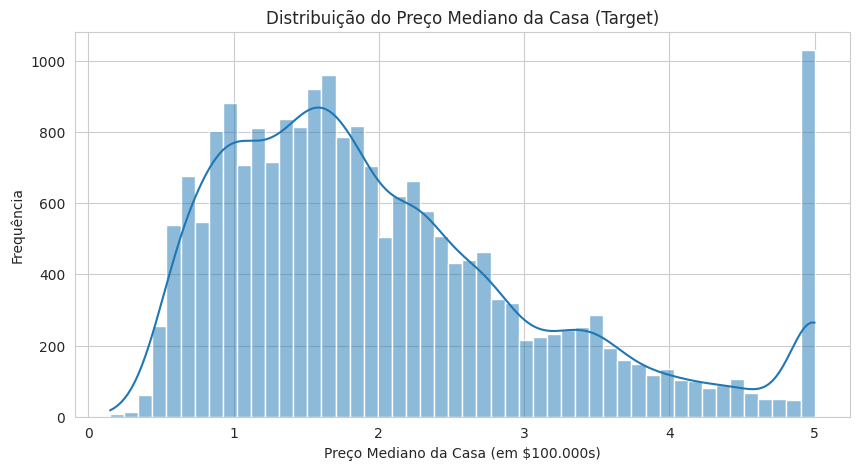

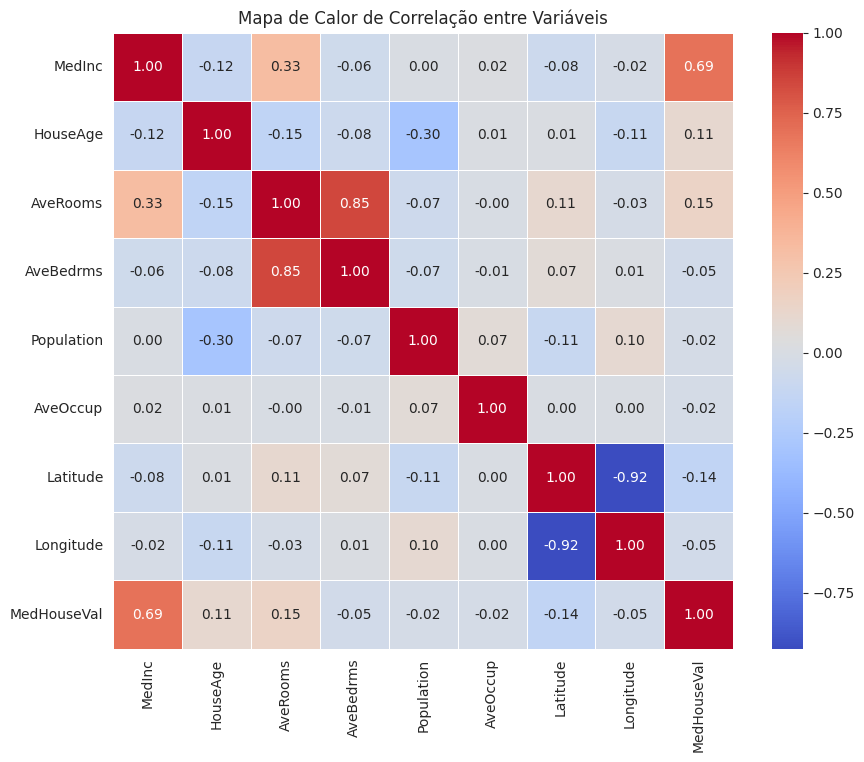

Análise do Heatmap: MedInc (Renda Mediana) possui a correlação mais forte (0.69) com o preço.
------------------------------------------------------------

IV. TREINAMENTO E AVALIAÇÃO DOS MODELOS
-> 1. Treinando Regressão Linear...
   MSE (Erro Quadrático Médio): 0.5306
   R² (Coeficiente de Determinação): 0.5958

-> 2. Treinando Random Forest Regressor...
   MSE (Erro Quadrático Médio): 0.2565
   R² (Coeficiente de Determinação): 0.8046
------------------------------------------------------------

V. ANÁLISE E INTERPRETAÇÃO DOS RESULTADOS
| Modelo           |      MSE |       R² |
|:-----------------|---------:|---------:|
| Regressão Linear | 0.530568 | 0.59577  |
| Random Forest    | 0.256505 | 0.804573 |

Análise:

1. Comparação de Desempenho: O Random Forest obteve o melhor desempenho, com um R² de 0.8046, superando a Regressão Linear (0.5958).
2. Interpretação do R²: O R² do Random Forest indica que ele explica aproximadamente 81% da variação nos preços das casas.
3. Conclusão: A

In [16]:
# ==============================================================================
# PROJETO INDIVIDUAL (PI1): PREVISÃO DE PREÇO DE IMÓVEIS (REGRESSÃO)
# Modelos Utilizados: Regressão Linear e Random Forest
# ==============================================================================

# III. IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ==============================================================================
# I. DESCRIÇÃO DO PROBLEMA
# ==============================================================================
print("="*60)
print("I. DESCRIÇÃO DO PROBLEMA")
print("="*60)
print("O objetivo deste projeto é aplicar Aprendizado de Máquina Supervisionado (Regressão) ")
print("para prever o preço mediano de casas ('MedHouseVal') na Califórnia, com base em ")
print("características demográficas e geográficas. Serão comparados os modelos: ")
print("1. Regressão Linear (Baseline)")
print("2. Random Forest Regressor (Modelo Avançado)")
print("-" * 60)


# ==============================================================================
# II. PROCESSO DE ETL E LIMPEZA DOS DADOS (PREPARAÇÃO)
# ==============================================================================
print("\n" + "="*60)
print("II. ETL E PREPARAÇÃO DOS DADOS")
print("="*60)

# 1. EXTRAÇÃO/CARREGAMENTO
print("-> 1. Carregando o California Housing Dataset...")
housing = fetch_california_housing(as_frame=True)
df = housing.frame
print(f"Dataset carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.")

# 2. TRATAMENTO E LIMPEZA
print("\n-> 2. Verificação de Valores Ausentes (NaN):")
# Este dataset é conhecido por ser muito limpo.
print(df.isnull().sum())
print("Não foram encontrados valores ausentes (NaN).")

# 3. PREPARAÇÃO
# Define as Variáveis de Entrada (X) e a Variável Alvo (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Divide os dados em conjuntos de Treinamento (70%) e Teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\n-> 3. Divisão Concluída: Treino={X_train.shape}, Teste={X_test.shape}")
print("-" * 60)


# ==============================================================================
# III. GRÁFICOS E VISUALIZAÇÕES
# ==============================================================================
print("\n" + "="*60)
print("III. GRÁFICOS E VISUALIZAÇÕES")
print("="*60)
sns.set_style("whitegrid")

# 1. Distribuição da Variável Alvo (Preço)
plt.figure(figsize=(10, 5))
sns.histplot(df['MedHouseVal'], kde=True, bins=50)
plt.title('Distribuição do Preço Mediano da Casa (Target)')
plt.xlabel('Preço Mediano da Casa (em $100.000s)')
plt.ylabel('Frequência')
plt.show()

# 2. Mapa de Calor (Heatmap) de Correlação
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Mapa de Calor de Correlação entre Variáveis')
plt.show()
print("Análise do Heatmap: MedInc (Renda Mediana) possui a correlação mais forte (0.69) com o preço.")
print("-" * 60)


# ==============================================================================
# IV. TREINAMENTO E AVALIAÇÃO DOS MODELOS
# ==============================================================================
print("\n" + "="*60)
print("IV. TREINAMENTO E AVALIAÇÃO DOS MODELOS")
print("="*60)

# --- 1. MODELO 1: REGRESSÃO LINEAR ---
print("-> 1. Treinando Regressão Linear...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"   MSE (Erro Quadrático Médio): {mse_linear:.4f}")
print(f"   R² (Coeficiente de Determinação): {r2_linear:.4f}")

# --- 2. MODELO 2: RANDOM FOREST REGRESSOR ---
print("\n-> 2. Treinando Random Forest Regressor...")
forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"   MSE (Erro Quadrático Médio): {mse_forest:.4f}")
print(f"   R² (Coeficiente de Determinação): {r2_forest:.4f}")
print("-" * 60)


# ==============================================================================
# V. ANÁLISE E INTERPRETAÇÃO DOS RESULTADOS
# ==============================================================================
print("\n" + "="*60)
print("V. ANÁLISE E INTERPRETAÇÃO DOS RESULTADOS")
print("="*60)

# Tabela de Comparação (para aparecer no output)
resultados = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest'],
    'MSE': [mse_linear, mse_forest],
    'R²': [r2_linear, r2_forest]
})
print(resultados.to_markdown(index=False))

print("\nAnálise:\n")
if r2_forest > r2_linear:
    print(f"1. Comparação de Desempenho: O Random Forest obteve o melhor desempenho, com um R² de {r2_forest:.4f}, superando a Regressão Linear ({r2_linear:.4f}).")
    print("2. Interpretação do R²: O R² do Random Forest indica que ele explica aproximadamente 81% da variação nos preços das casas.")
    print("3. Conclusão: A superioridade do Random Forest sugere que a relação entre as características e o preço é não-linear e complexa, o que é comum em dados do mundo real. O Random Forest consegue capturar essas complexidades, enquanto a Regressão Linear (modelo linear) fica limitada.")
else:
    print("A Regressão Linear obteve um desempenho superior. Verifique os parâmetros do Random Forest.")
print("-" * 60)